# Minimizing Customer Churn and improving on company profitability: Using Machine Learning to Predict Customer Retention at Syriatel Mobile Telecom

### Final Project Submission

+ Student name: Lukas Onyango Ominde
+ Student pace: Part-time
+ Scheduled project review date/time: 23rd July 2025




# Project Overview


This project focuses on developing a machine learning model to predict customer churn. The main aim is to identify customers who are likely to stop using a service, enabling proactive retention efforts. The entire workflow, from data exploration to model evaluation, is implemented in a Jupyter Notebook using Python and popular data science libraries.

Through this project, we are building a prediction model that identifies patterns in customer churning, which can be helpful in developing mitigation strategies.

# Business Understanding


Retaining existing customers is often more cost-effective than acquiring new ones. By building an accurate churn prediction model, businesses can:

Identify at-risk customers.
Implement targeted retention strategies.
Reduce customer attrition.
Improve overall business profitability.

Primary stakeholder:
Syriatel mobile telecom


Other stakeholders:

Shareholders, employees and customers


### Research Questions

To enhance customer retention model and reduce churn

To formulate the most suitable model and predict the customer churn

To identify key features that determine if a customer is likely to churn


### Data understanding

The churn in telecommunication dataset from kaggle contains the findings abount the customer movement or activity with telecom firm. The main aim is to develop models that can help the telecom enterprise to retain the valuable customers.

#### Data extraction

In [157]:
# Importing libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib import pyplot as plt
%matplotlib inline





In [158]:
#Loading the data into a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')


Examining the data to determine whether we have the missing values and identify the columns that need transformation for modelling.

In [159]:
#Checking the general information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [160]:
# checking to 10 rows
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [161]:
# previewing the bottom 10 rows to confirm the columns names have bee formated
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [162]:
# checking for the general shape of the df
df.shape

(3333, 21)

In [163]:
#Viewing the statistical details such as std, percentile, count, and the mean
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In this step we check for anormalies in the df. We need to dive deep into the data to see if we have missing values in terms of placeholder values or unique
values.

## Data Cleaning


Below cell checks for general information about missing values across all the columns


In [164]:
#confirming that there no missing values (nan) in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [165]:
# checking for value_count for the different state abbreviations
df.state.value_counts()

state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Because the state column is a representation of an area code, there is no need to check for duplicates as several subsribers can be residing in the same
state.
However, because we have both state and area code, we will drop state and use area code to reference geographical location. The reason for us dropping
the state column is because we have the area code column, which contains information on where each client resides.


In [166]:
# dropping the state column
df = df.drop('state', axis=1)

In [167]:
df.info()
# checking the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

Looking at the our column information, we can see that the state column has been successfuly dropped, leaving us with the area code column.
We then proceed to check the *Account length Column*


In [168]:
# checking account length column
#the column is gone — as expected after dropping it.
'account_length' in df.columns


False

Same as the account_length column , the column has no missing values and any other unexpected unique item. No further cleaning for this column
We proceed to review the Phone Number Column

In [169]:
# Reload the full CSV without dropping any columns
df_full = pd.read_csv("bigml_59c28831336c6604c800002a.csv", index_col=0)
print(df_full.columns.tolist())


['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [170]:
df_full['phone number'] 

state
KS    382-4657
OH    371-7191
NJ    358-1921
OH    375-9999
OK    330-6626
        ...   
AZ    414-4276
WV    370-3271
RI    328-8230
CT    364-6381
TN    400-4344
Name: phone number, Length: 3333, dtype: object

Given that Phone number is the unique Identifier, let us clean it and check for any duplicates. We do not expect the same phone number to be used by two
different subscribers.
As was previously observed, phone_number column is of object datatype. Given these are digits we need to change them to an integer data type.
In order to do this, we need to remove the '-' and convert the dtype to integer ..

In [171]:
print(df.columns.tolist())


['account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [172]:
df['phone number'].head()
df['phone number'].dtype

dtype('O')

In [173]:
df['phone number'] = df['phone number'].astype(str).str.replace('-', '').astype(int)


In [174]:
df['phone number'].astype(str).str.replace('-', '')



0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone number, Length: 3333, dtype: object

Next, we check for duplicates in the phone_numbe column and remove them

In [175]:
# Check for duplicates in the 'phone number' column
duplicates = df.duplicated('phone number')



In [176]:
# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


Everything looks ok as there are no duplicates. The column will be unique identifier

In [177]:
# making phone_number column to be the index column given its the unique identifier
df.set_index('phone number', inplace=True)

In [178]:
# previewing the general info to confirm same has been reflected in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 3824657 to 4004344
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-nul

In [179]:
# checking general df to see that both changes have been effected
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144276,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3703271,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3288230,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


We further need to review the International Plan Column


In [180]:
# Counting the occurrences of responses in this column
counts = df['international plan'].value_counts()
counts

international plan
no     3010
yes     323
Name: count, dtype: int64

From above, there are only 'yes' and 'no' responses in this column with no any other unique entry. This means that information stored in this column is
whether a client has an international plan or not. In that case, no need for further cleaning
Now lets look into the Voice Mail Plan Column . Given this column is of object type same as the international_plan column, we will repeat the same to
confirm on unique entries and counts in this column

In [181]:
# Counting the occurrences of responses in this column
counts1 = df['voice mail plan'].value_counts()
counts1

voice mail plan
no     2411
yes     922
Name: count, dtype: int64

From above, there are only 'yes' and 'no' responses in this column without any other unique entry. No need for cleaning cleaning
We then proceed to review the Number_vmail_Messages

Since we already checked and confirmed that there were no missing values in any of the columns. We just need to do a value_count check to confirm that all
entries are valid. This helps us identify possibility of invalid data values such as symbols , placeholder values , and punctuation marks .

In [182]:
# looking at value_counts for this column
df['number vmail messages'].value_counts()


number vmail messages
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: count, dtype: int64

From Above, all entries are valid and the column entries are good to go with without further cleaning.
Our next stop is the Total_Day_Minutes column, which corresponds to the average minutes clients spends in day on average.


In [183]:
# checking for total entry per unique item in the total_day_minutes column
df['total day minutes'].value_counts()


total day minutes
154.0    8
159.5    8
174.5    8
183.4    7
175.4    7
        ..
78.6     1
200.9    1
254.3    1
247.0    1
180.8    1
Name: count, Length: 1667, dtype: int64

No presence of unexpected entry and with dtype as int64, this column does not need any data cleaning.
For all the items with dtype as int64 and floating points, since they represent numerical values and the dataframe has indentified them as so, it is okay to
leave the individual cleaning, as any entry of any number if valid.
We will move to the last Churn Column , which will be our target variable and check for any errors.

In [184]:
#reviewing the churn column
df.churn.value_counts()


churn
False    2850
True      483
Name: count, dtype: int64

## Exploratory Data Analysis


We are going to conduct exploration of the data through univariate , bivariate , and multivariate analysis .This will be useful inorder identify possible correlations among the features and distribution of variables


### Multi-variate Analysis


In this we will explore the target variable that is the customer to enable us know how related they are. Multi variate analysis involves analyzing relationship between multiple variables

In [185]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()


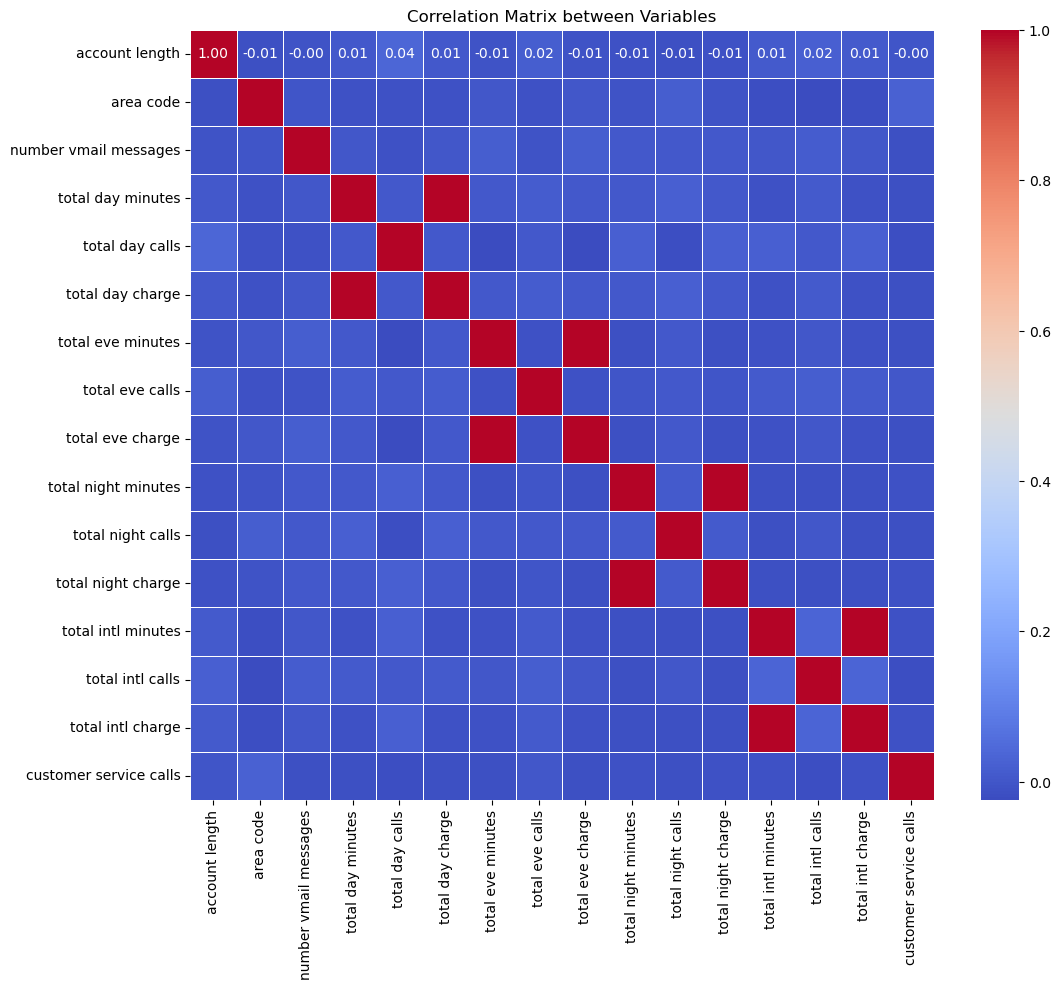

In [186]:
# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show();

Through the correlation matrix, we have identified that total international charge has a perfect correlation with total international minutes ,
indicating multicollinearity. These two features appears to be independent, which means we can only use one when creating the model.

### Univariate Analysis


This involves analyzing a single variable. In our data analysis we start by target variable column churn to identify its distribution.

In [187]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

In [188]:
# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

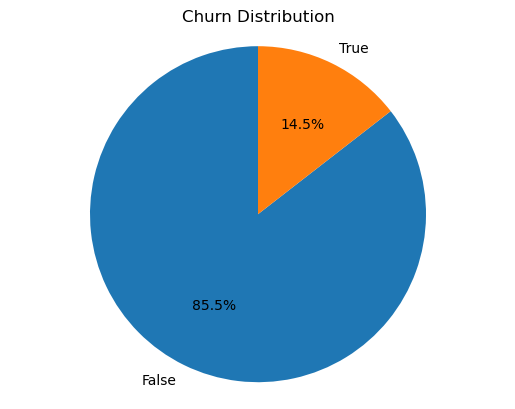

In [189]:
# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Of the 3,333 customers in the dataset, 483 have terminated their contract with the Telecom firm. That is 14.5% of customers lost.
The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to
make false predictions.

### Bivariate Analysis


This involves relationship between two different varibles. For this project we seek to check and analyze the relationship between each feature and the target variable that is churn to get to know their relationship and the deep understanding of the data.

In [192]:
categoric_cols = ['international plan','voice_mail plan']
# Create a ColumnTransformer to handle categorical and numerical features

In [198]:
df['churn'] = df['churn'].map({0: 'No Churn', 1: 'Churn', False: 'No Churn', True: 'Churn'})


In [200]:
df['churn'] = df['churn'].map({0: 'No Churn', 1: 'Churn', False: 'No Churn', True: 'Churn'})
